In [1]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


In [2]:
n = pypsa.Network("/home/cpschau/Code/dev/BRIGHT/submodules/pypsa-earth-sec/results/0920_eia_hydro_norma/postnetworks/elec_s_11_ec_lv2.0_Co2L_144H_2030_0.071_BI_0export.nc")

/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Va

In [10]:
installed_capacities = n.statistics.installed_capacity()
installed_capacities = installed_capacities[installed_capacities > 0].div(1e3)
installed_capacities = installed_capacities.drop(index=installed_capacities.index[installed_capacities.index.get_level_values(1).str.contains("solid biomass|biogas|AC")])
installed_capacities.index = installed_capacities.index.droplevel(0)
installed_capacities

carrier
BEV charger            2.065074
V2G                    2.065074
Reservoir & Dam       71.279433
Li ion                 4.693351
Biomass               16.920989
Coal                   3.921947
Combined-Cycle Gas    30.332911
Nuclear                3.395000
Oil                    8.280472
Onshore Wind          33.245500
Run of River          43.470413
Solar                 18.000100
dtype: float64

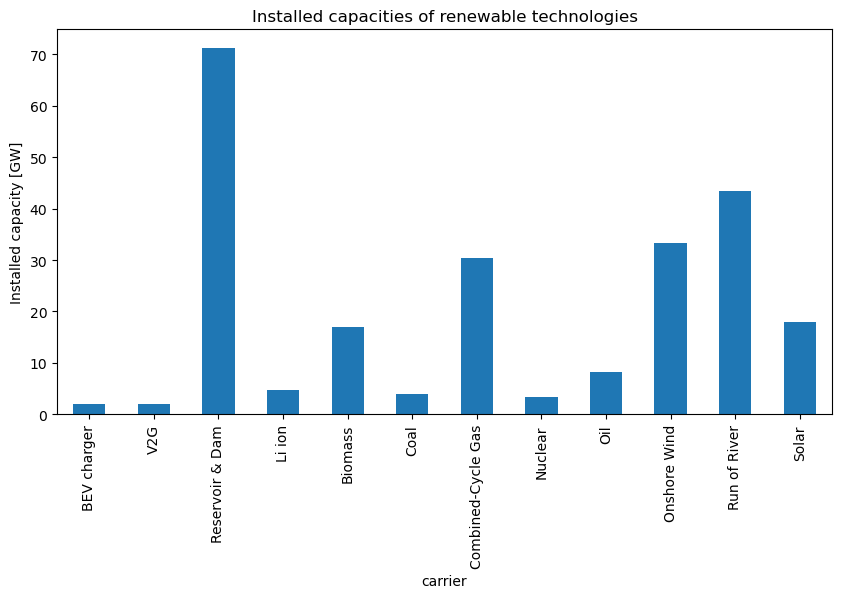

In [13]:
installed_capacities.plot(kind="bar", figsize=(10, 5))
plt.ylabel("Installed capacity [GW]")
plt.title("Installed capacities of renewable technologies")
plt.show()